<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/07Apr20_0_defining_random_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining Random Variables

### Introduction

Now so far, we have seen how we can learn about a variable by plotting either a frequency distribution, and exploring summary statistics, or exploring the same information with a sample from the population.

One way to describe our variable is as a random variable.  We'll learn how a random variable can help us to answer questions about variable in this lesson.

### Loading the data

In this lesson we'll use NYC schools eighth grade scores for NY state's standardized math exam.  Let's load up the data.

In [0]:
import pandas as pd 
url = "https://raw.githubusercontent.com/jigsawlabs-student/modeling-distributions/master/scores_grade_eight_2015.csv"
df = pd.read_csv(url, index_col = 0)

In [0]:
df.shape

(472, 8)

In [0]:
df[:3]

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
53,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,59,298.0,21.0,24.0,9.0,5.0
136,01M140,P.S. 140 NATHAN STRAUS,58,285.0,28.0,26.0,4.0,0.0
169,01M184,P.S. 184M SHUANG WEN,56,360.0,0.0,4.0,13.0,39.0


From here, we can use numpy to select a sample from our dataframe.

In [0]:
sample_df = df.sample(n = 100, random_state = 5)

In [0]:
sample_df[:3]

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
13675,31R027,I.S. 027 ANNING S. PRALL,385,295.0,158.0,133.0,63.0,31.0
6491,14K318,I.S. 318 EUGENIO MARIA DE HOSTOS,328,289.0,116.0,184.0,27.0,1.0
10264,24Q061,I.S. 061 LEONARDO DA VINCI,768,295.0,295.0,318.0,102.0,53.0


### Breaking down the problem

So here's how we'd like to use this data.

Let's say that our older sister, Michelle, is considering a move to NYC, and that she currently live in Albany.  She wants to make sure that if she move, her child, Emmet, doesn't get placed at a significantly worse school.  Emmet's school had an average score of 310 in 2015 (when our data is from).

Ok, now let's try to be a bit formal in the way that we break down this problem.  We'll frame the problem of consisting of an **experiment**, that has will have an **outcome** from the **sample space**, which can either be **continuous or discrete**.  We'll explain:

1. An experiment/trial

> In probability theory, an **experiment or trial** is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes.

* The assignment of Emmet to a school is called an *experiment* or *trial*.

2. An outcome
* The average math score of Emmet's school is called an outcome.
> An **outcome** is the result of an experiment.

3. Sample space
> The sample space is the set of all possible outcomes to an experiment.

* So the set of all possible average scores Emmet's school can have is the sample space of the experiment.  The range of scores on the test is between 148 and 423, so the average score Emmet's school can have is any number in between.

* $\Omega = [148, 423]$

> Capital omega is used to represent the sample space.  The square brackets mean the range is inclusive.  To represent exclusive, rounded brackets can be used. $\Omega = [148, 423)$ means 148 to 423, but not including 423.

4. Continuous or Discrete

It's useful to get a sense of if the sample space is continuous or discrete.  

<img src="https://github.com/jigsawlabs-student/modeling-distributions/blob/master/discrete-cont-side.png?raw=1" width="50%">

A. Discrete 
* A sample space is **discrete** if there are *countably many outcomes*.  
The number of shots a basketball player makes in a game is discrete.  A basketball player can make 20 shots, but not 20.1, or 35.9.

B. Continuous

* A sample space is **continous** if the set of outcomes consists of any value between the minimum value and maximum value in the sample space.

For example, the weight of an individual is continous.  It can take on any value above zero.  It's the same thing for the height.  Here, because we our sample space consists of the set of the *average scores* Emmet's school can have, this sample space is continuous. 

### Probability distributions and Random Variable

The average math score of Emmet's assigned school is an example of a *random variable*.

> A **random variable** is described informally as a variable whose values depend on outcomes of a random phenomenon. - [Wikipedia](https://en.wikipedia.org/wiki/Random_variable)

Random variables occur all over the place.  For example, if we want to see get a sense of how tall a newborn may grow to be, we know one component of this is due to random chance.  And therefore this another example of a random variable.  Here, the average math score of Emmet's assigned school is an example of a random variable.

> Once more a **random variable** is described a variable whose values depend on outcomes of a random phenomenon.

Let's represent this random variable as $X$.

> $X = $  the math score of Emmet's assigned school.

Now we can ask questions of the random variable.  For example, if we want to ask the the probability that Emmet's school's score is 310, we would say:

* $P(X = 310)$

And the probability that the school's score is 300 is:

* $P(X = 300)$

Now to represent the probability of that this random variable takes on any value in the sample space, we use the probability distribution function:

> The **probability distribution function** of a random variable is a mathematical function that provides the probabilities of occurrence of different possible outcomes in that random variable.

> If our random variable is continuous, we call this the **probability density funtion**.

To show the probability distribution function our defined random variable $X$ above, we can simply plot the different math average math scores a school in NYC can take, and the probability of each score.

> Here we'll just look to our sample to get those probabilities.

In [0]:
sample_df.head()

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
13675,31R027,I.S. 027 ANNING S. PRALL,385,295.0,158.0,133.0,63.0,31.0
6491,14K318,I.S. 318 EUGENIO MARIA DE HOSTOS,328,289.0,116.0,184.0,27.0,1.0
10264,24Q061,I.S. 061 LEONARDO DA VINCI,768,295.0,295.0,318.0,102.0,53.0
12716,29Q138,P.S./ M.S.138 SUNRISE,41,264.0,33.0,8.0,0.0,0.0
3804,09X219,I.S. 219 NEW VENTURE SCHOOL,108,254.0,88.0,20.0,0.0,0.0


In [0]:
avg_score = sample_df['Mean Scale Score']

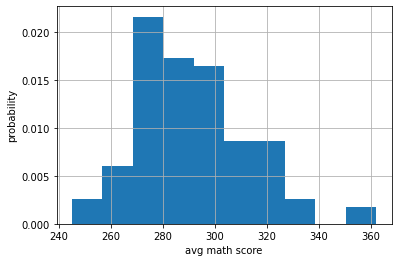

In [0]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True)
ax.set(xlabel = 'avg math score', ylabel = 'probability')
pdf_fig = plt.gcf()

> The key line is: `ax = avg_score.hist(density = True)`

So the above is a plot of the probability distribution function for our random variable $X$.  Let's make sure that we can interpret the above.  Across the bottom are the range of values in our sample space and vertically we are representing the corresponding probability of each outcome.

So we can read the graph above as saying there's a $.21$ probability that Emmet's school's math score is 300.

* $P(X = 300) = .21$

How did we get the probability distribution above.  We just took counts of all the values (our frequency distribution), and divided it by the size of our sample.  This shows us **relative frequencies** of each outcome in our distribution's sample space.

> Pandas can do this for us.

In [0]:
avg_score.value_counts(normalize = True).sort_index().iloc[:10]

245.0    0.010101
250.0    0.010101
254.0    0.010101
259.0    0.010101
262.0    0.010101
264.0    0.030303
265.0    0.010101
266.0    0.010101
269.0    0.030303
270.0    0.010101
Name: Mean Scale Score, dtype: float64

So this is just our probability distribution function again, this time in a table form (as opposed to a graph).  The value and the corresponding probability.  The return value from the `value_counts(normalize=True)` also returns to us our probability distribution function for a random variable.

> Every outcome in the sample space that is not that is not listed, we can set equal to zero.

Now that in calling this our probability distribution function, we are making a pretty large assumption - that these relative frequencies in our sample are also the probabilities of occurrence in the future.  But for now, it's ok.    

### Summary

In this lesson we learned about random variables.  A random variable as a variable whose values depend on outcomes of a random phenomenon.  A random variable has a sample space, which is the set of all possible outcomes.  And that sample space can be either continuous or discrete.  

A sample space is continous if the set of outcomes consists of any value between the minimum value and maximum value in the sample space.   A sample space is discrete if there are countably many outcomes. 

<img src="https://github.com/jigsawlabs-student/modeling-distributions/blob/master/discrete-cont-side.png?raw=1" width="30%">

Here, we defined our random variable $X$ where $X = $  the math score of Emmet's assigned school.

Each random variable has a probability distribution function, which is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.  Here, we used the relative frequencies in our random sample to define the probability distribution function.

In [0]:
avg_score.value_counts(normalize = True).sort_index().iloc[:10]

245.0    0.010101
250.0    0.010101
254.0    0.010101
259.0    0.010101
262.0    0.010101
264.0    0.030303
265.0    0.010101
266.0    0.010101
269.0    0.030303
270.0    0.010101
Name: Mean Scale Score, dtype: float64

Or in graph form:

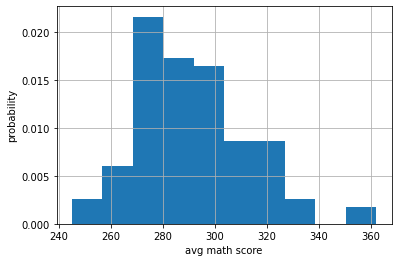

In [0]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True)
ax.set(xlabel = 'avg math score', ylabel = 'probability')
pdf_fig = plt.gcf()